<a href="https://colab.research.google.com/github/Shanmukha2775/Fmml-lab-2024/blob/main/FMML_M4_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

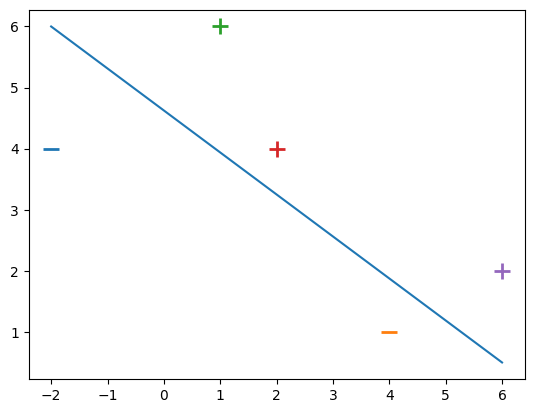

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

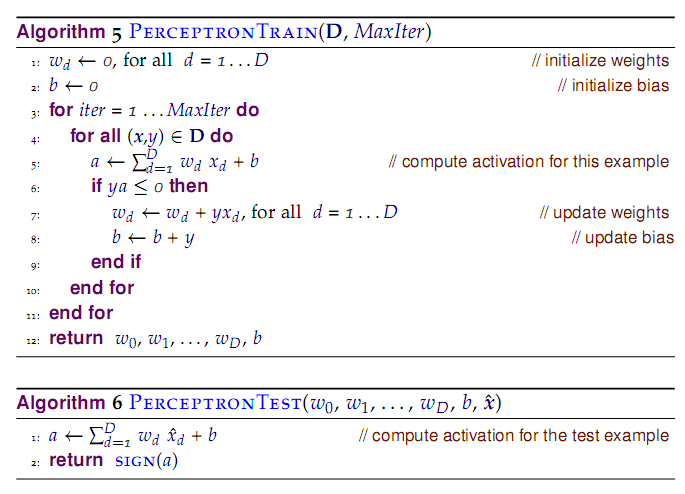

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

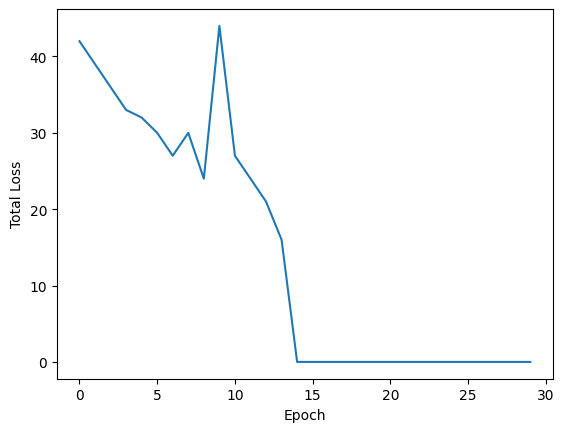

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

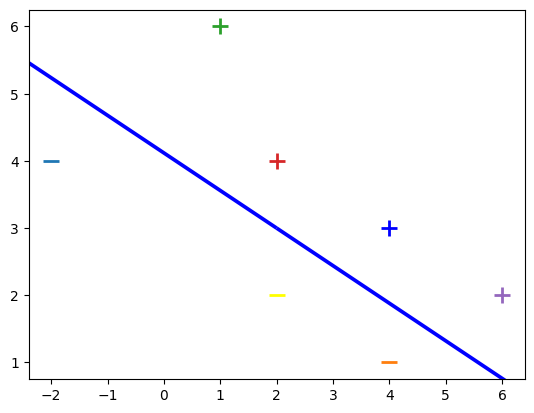

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

#**Answer:1**

Accuracy: 0.8333333333333334


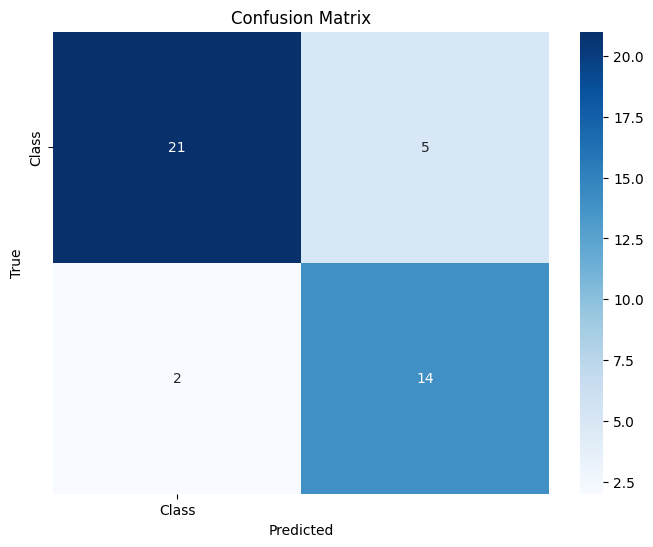

In [ ]:

from sklearn.datasets import fetch_openml

# Load Sonar dataset
sonar = fetch_openml(name='sonar', version=1)
X = sonar.data
y = sonar.target
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the model
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sonar.target_names, yticklabels=sonar.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#**Answer:2**

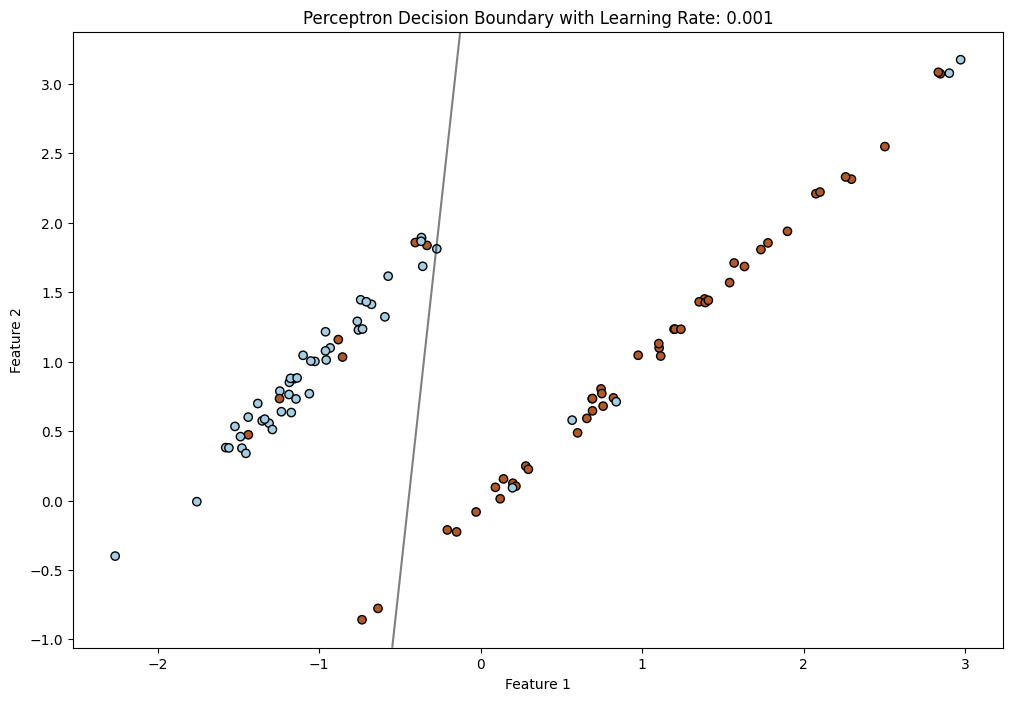

Learning Rate: 0.001, Accuracy: 0.8


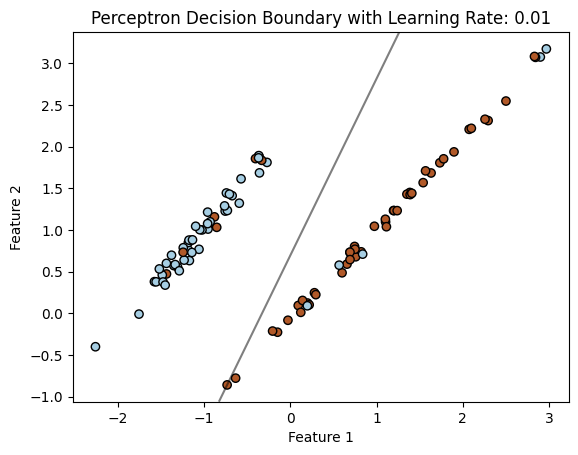

Learning Rate: 0.01, Accuracy: 0.8


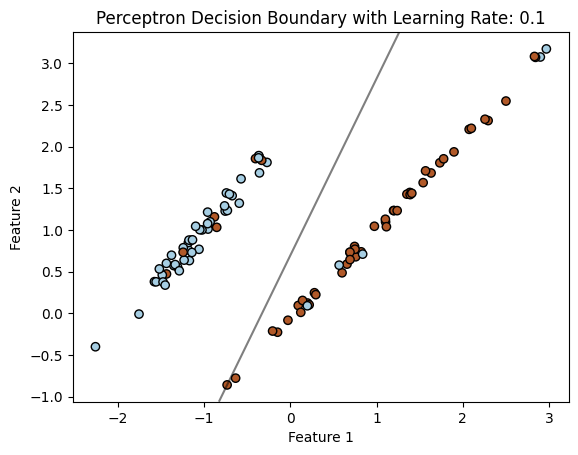

Learning Rate: 0.1, Accuracy: 0.8


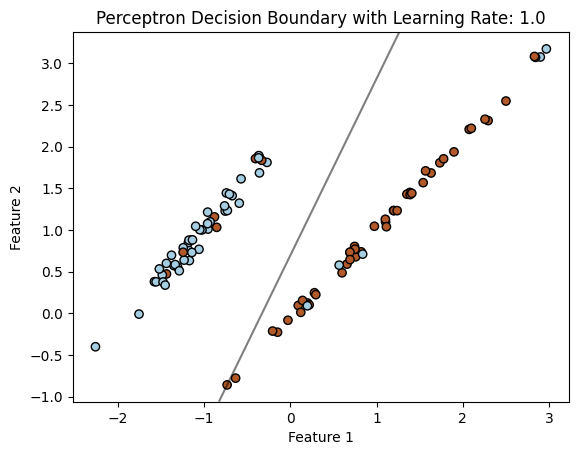

Learning Rate: 1.0, Accuracy: 0.8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a toy dataset that is not linearly separable
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 1.0]

plt.figure(figsize=(12, 8))

for lr in learning_rates:
    # Create and train the perceptron model with different learning rates
    perceptron = Perceptron(max_iter=1000, eta0=lr, random_state=42)
    perceptron.fit(X_train, y_train)

    # Make predictions
    y_pred = perceptron.predict(X_test)

    # Visualize the decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = perceptron.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary and margins
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
    plt.title(f'Perceptron Decision Boundary with Learning Rate: {lr}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Learning Rate: {lr}, Accuracy: {accuracy}')

#**Answer:3**

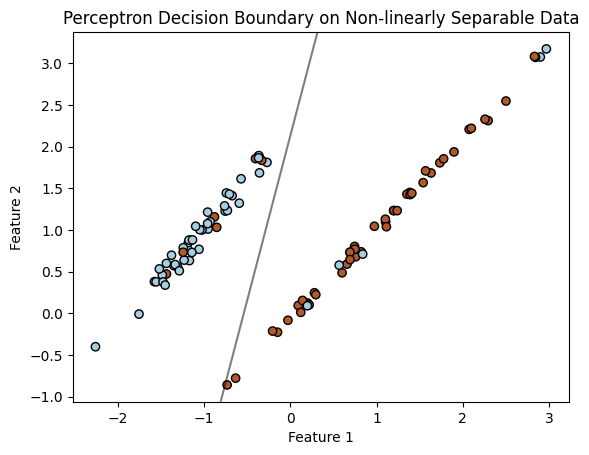

Accuracy: 0.8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a toy dataset that is not linearly separable
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the perceptron model
perceptron = Perceptron(max_iter=1000)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = perceptron.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.title('Perceptron Decision Boundary on Non-linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


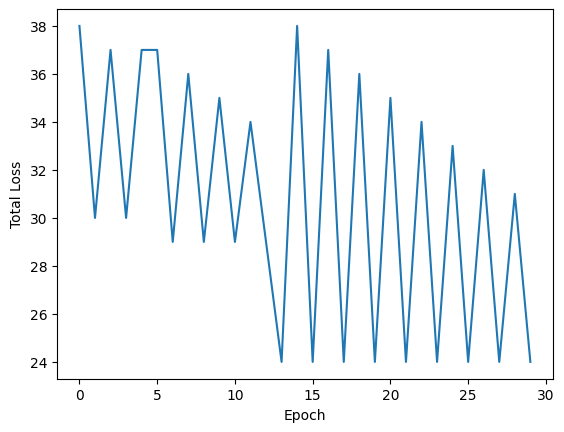

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.



#**Answer:1**
---


(i).Can the Perceptron Learn this Dataset?



Yes, a Perceptron can learn this dataset. This is because the "AND" function can be separated by a straight line when plotted on a graph. In other words, you can draw a line that separates the outputs - and + correctly.

For the "AND" function, we have the following input-output pairs:

Input (0, 0) → Output: -

Input (0, 1) → Output: -

Input (1, 0) → Output: -

Input (1, 1) → Output: +


These points can be divided by a line in the space formed by the inputs, making it possible for a Perceptron to learn this function.

(ii).Weight Update Procedure



Let’s go over how the Perceptron updates its weights (the values it uses to make predictions) in each step until it learns the function.

Given:

We start with initial weights and bias as zero.

We have a learning rate (for simplicity, let’s assume it's 1).


Each time the Perceptron makes an incorrect prediction, it updates its weights and bias based on the true output.


---

Step-by-Step Iteration:

1. Iteration 1:

Input (0, 0), Output: -

Prediction is incorrect.

Update weights and bias to try to improve.



2. Iteration 2:

Input (0, 1), Output: -

Prediction is correct.

No update needed.



3. Iteration 3:

Input (1, 0), Output: -

Prediction is correct.

No update needed.



4. Iteration 4:

Input (1, 1), Output: +

Prediction is incorrect.

Update weights and bias again.



5. Iteration 5: (Checking from the start again)

Input (0, 0), Output: -

Prediction is still incorrect.

Update weights and bias again.



6. Repeat this process for each input until the Perceptron no longer makes any mistakes.






After several passes through the dataset, the Perceptron will eventually learn weights that correctly classify all examples for the "AND" function.

---

#**Answer:2**
Out of the 16 possible distinct Boolean functions over a 2-bit binary input, 14 can be learned by a Perceptron. The remaining 2 functions are not learnable.

*Learnable functions:* 14

These include:

- Linearly separable functions (e.g., AND, OR, NAND, NOR)
- Functions with a single "transition" (e.g., x1, x2, x1 ∧ ¬x2)

*Not learnable:* 2

These are:

1. *XOR (Exclusive OR)*

Truth table:

| x1 | x2 | y |
| --- | --- | --- |
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

1. *XNOR (Exclusive NOR)*

Truth table:

| x1 | x2 | y |
| --- | --- | --- |
| 0  | 0  | 1 |
| 0  | 1  | 0 |
| 1  | 0  | 0 |
| 1  | 1  | 1 |

These two functions are not learnable by a Perceptron because they are not linearly separable.

*Reason:* Perceptrons can only learn linear decision boundaries. XOR and XNOR require non-linear decision boundaries, making them impossible for a Perceptron to learn.

To learn these functions, more complex models like Multi-Layer Perceptrons (MLPs) or other non-linear classifiers are needed.

*Note:* The number of learnable Boolean functions for a Perceptron increases as the number of layers or units increases. However, for a single-layer Perceptron, 14 out of 16 functions are learnable.